# Trader Performance vs Market Sentiment Analysis

Objective:
To analyze how market sentiment (Fear vs Greed) influences trader behavior and performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
sentiment = pd.read_csv("data/fear_greed_index.csv")
trades = pd.read_csv("data/historical_data.csv")

In [4]:
print("Sentiment shape:",sentiment.shape)
print("Trades shape:",trades.shape)

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [5]:
print("Sentiment Columns:")
print(sentiment.columns)
print("\nTrades columns:")
print(trades.columns)

Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='str')

Trades columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='str')


## Data Overview

We analyze two datasets:
1. Bitcoin Fear & Greed Index (daily sentiment classification)
2. Historical trader data (trade-level execution and PnL)

The goal is to align both datasets on daily level and examine behavioral differences.

In [6]:
print("Sentiment Missing Values:")
print(sentiment.isnull().sum())

print("\nTrades Missing values:")
print(trades.isnull().sum())

Sentiment Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [7]:
print("Sentiment Duplicates:",sentiment.duplicated().sum())
print("Trades Duplicates:",trades.duplicated().sum())

Sentiment Duplicates: 0
Trades Duplicates: 0


In [8]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date'] = sentiment['date'].dt.date

In [9]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'],dayfirst=True, errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date

In [10]:
sentiment['sentiment_type'] = sentiment['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

## Data Alignment

Both datasets were aligned on daily date level. Sentiment was simplified into two categories: Fear and Greed.
A left join was performed to attach sentiment to each trade.

In [11]:
merged = trades.merge(
    sentiment[['date', 'sentiment_type']],
    on='date',
    how='left'
)

In [12]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_type
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed


In [13]:
merged['sentiment_type'].value_counts()

sentiment_type
Greed    127981
Fear      83237
Name: count, dtype: int64

In [14]:
merged['win'] = merged['Closed PnL'] > 0

In [15]:
merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'sentiment_type', 'win'],
      dtype='str')

In [16]:
daily_pnl = merged.groupby(['date','Account'])['Closed PnL'].sum().reset_index()

In [17]:
daily_pnl.head()

,date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


In [18]:
win_rate = merged.groupby('Account')['win'].mean().reset_index()
win_rate.head()

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


## Sentiment-Level Performance Comparison

We compare average PnL, win rate, position size, and volatility across Fear and Greed regimes.

In [19]:
merged.groupby('sentiment_type')['Size USD'].mean()

sentiment_type
Fear     7182.011019
Greed    4635.764077
Name: Size USD, dtype: float64

In [20]:
merged['sentiment_type'].value_counts()

sentiment_type
Greed    127981
Fear      83237
Name: count, dtype: int64

In [21]:
merged.groupby(['sentiment_type','Side']).size()

sentiment_type  Side
Fear            BUY     41205
                SELL    42032
Greed           BUY     61485
                SELL    66496
dtype: int64

In [22]:
merged.groupby('sentiment_type')['Closed PnL'].mean()

sentiment_type
Fear     49.212077
Greed    48.118246
Name: Closed PnL, dtype: float64

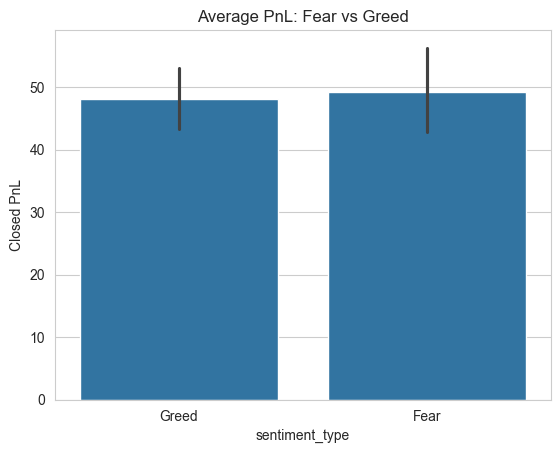

In [23]:
sns.barplot(data=merged, x='sentiment_type', y='Closed PnL')
plt.title("Average PnL: Fear vs Greed")
plt.show()

In [24]:
merged.groupby('sentiment_type')['win'].mean()

sentiment_type
Fear     0.407871
Greed    0.413444
Name: win, dtype: float64

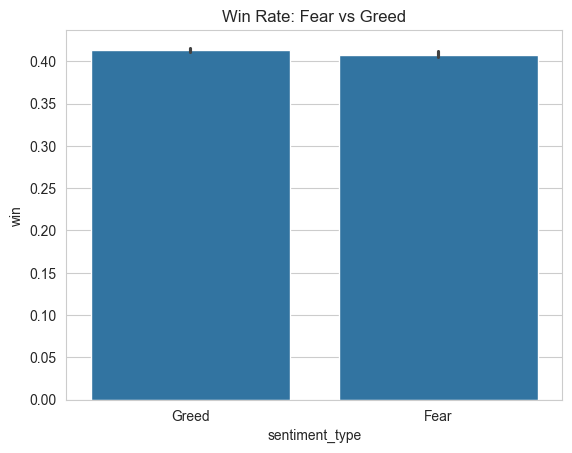

In [25]:
sns.barplot(data=merged, x='sentiment_type', y='win')
plt.title("Win Rate: Fear vs Greed")
plt.show()

In [26]:
merged.groupby('sentiment_type')['Size USD'].mean()

sentiment_type
Fear     7182.011019
Greed    4635.764077
Name: Size USD, dtype: float64

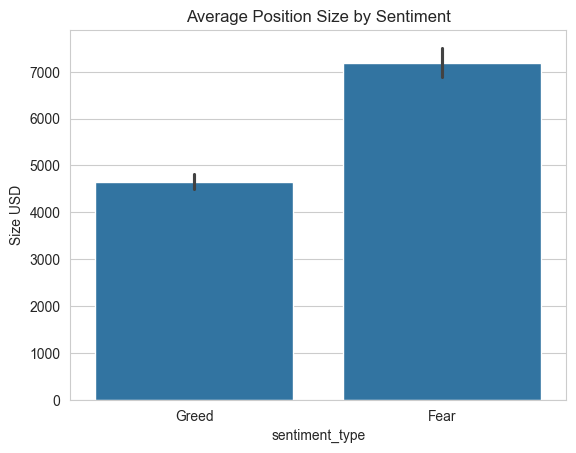

In [27]:
sns.barplot(data=merged, x='sentiment_type', y='Size USD')
plt.title("Average Position Size by Sentiment")
plt.show()

In [28]:
merged.groupby(['sentiment_type','Side']).size()

sentiment_type  Side
Fear            BUY     41205
                SELL    42032
Greed           BUY     61485
                SELL    66496
dtype: int64

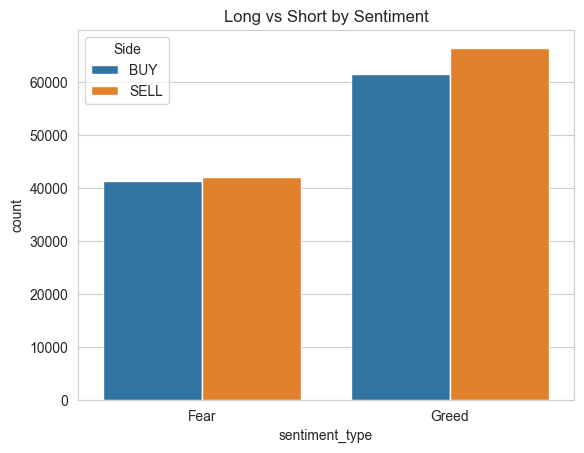

In [29]:
bias = merged.groupby(['sentiment_type','Side']).size().reset_index(name='count')

sns.barplot(data=bias, x='sentiment_type', y='count', hue='Side')
plt.title("Long vs Short by Sentiment")
plt.show()

In [30]:
merged.groupby('sentiment_type')['win'].mean()

sentiment_type
Fear     0.407871
Greed    0.413444
Name: win, dtype: float64

In [31]:
merged.groupby('sentiment_type')['Size USD'].mean()

sentiment_type
Fear     7182.011019
Greed    4635.764077
Name: Size USD, dtype: float64

In [32]:
merged.groupby('sentiment_type')['Closed PnL'].std()

sentiment_type
Fear     990.875398
Greed    867.308701
Name: Closed PnL, dtype: float64

## Trader Segmentation

To uncover deeper behavioral patterns, traders were segmented into:

1. High vs Low Risk (based on position size)
2. Frequent vs Infrequent traders
3. Consistent vs Inconsistent traders

In [33]:
threshold = merged['Size USD'].median()
merged['risk_type'] = merged['Size USD'].apply(
    lambda x: 'High Risk' if x > threshold else 'Low Risk'
)
merged.groupby(['risk_type','sentiment_type'])['Closed PnL'].mean()

risk_type  sentiment_type
High Risk  Fear              87.647166
           Greed             96.552173
Low Risk   Fear               2.971356
           Greed              5.166153
Name: Closed PnL, dtype: float64

In [34]:
trade_counts = merged.groupby('Account').size().reset_index(name ='total_trades')
trade_counts.head()

,Account,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [35]:
threshold = trade_counts['total_trades'].quantile(0.7)

trade_counts['trader_type'] = trade_counts['total_trades'].apply(
    lambda x: 'Frequent' if x > threshold else 'Infrequent'
)
merged = merged.merge(trade_counts[['Account','trader_type']], 
                      on='Account', 
                      how='left')
merged.groupby(['trader_type','sentiment_type'])['Closed PnL'].mean()

trader_type  sentiment_type
Frequent     Fear              26.730589
             Greed             42.472846
Infrequent   Fear              96.380780
             Greed             70.159233
Name: Closed PnL, dtype: float64

In [36]:
merged.groupby(['trader_type','sentiment_type'])['win'].mean()

trader_type  sentiment_type
Frequent     Fear              0.411212
             Greed             0.419512
Infrequent   Fear              0.400864
             Greed             0.389753
Name: win, dtype: float64

In [37]:
win_rate_account = merged.groupby('Account')['win'].mean().reset_index()
win_rate_account.head()

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [38]:
win_rate_account['consistency_type'] = win_rate_account['win'].apply(
    lambda x: 'Consistent' if x >= 0.5 else 'Inconsistent'
)
merged = merged.merge(win_rate_account[['Account','consistency_type']], 
                      on='Account', 
                      how='left')
merged.groupby(['consistency_type','sentiment_type'])['Closed PnL'].mean()

consistency_type  sentiment_type
Consistent        Fear              28.846388
                  Greed             49.682534
Inconsistent      Fear              49.848419
                  Greed             47.970757
Name: Closed PnL, dtype: float64

## KEY INSIGHTS

1. Infrequent traders performs better than frequent traders across both the sentiments (Fear & Greed).
   
2. High risk traders perform better especially during the greed period of time.

3. During the period of fear there is higher volatility indicating increased risk exposure.

## STRATEGY RECOMMENDATIONS

1. Avoid overtrading: Infrequent traders show higher profitability across both sentiments (Fear & Greed).

2. During Greed periods, controlled high-risk can increase returns, but implement stricter risk controls during Fear due to increased volatility.